# Style
---------------------------------------

In this section, you can learn how to apply default style or your original style. And you can also understand how to apply descrete or continuous mapping.


## Table of contents
---------------------------------------
- Get the default Style and apply it
- Get visual propeties
- Create original Style and apply it
- Create passthrough mapping
- Create continuous mapping 
- Create descrete mapping

# Prepare network data
---------------------------------------

To execute this cookbook's example, first you prepare network data.

In [75]:
from py2cytoscape.data.cynetwork import CyNetwork
from py2cytoscape.data.cyrest_client import CyRestClient
from py2cytoscape.data.style import StyleUtil
import py2cytoscape.util.cytoscapejs as cyjs
import py2cytoscape.cytoscapejs as renderer

import networkx as nx
import pandas as pd
import json
from IPython.display import Image

# Create py2cytoscape client
cy = CyRestClient()

# Reset
cy.session.delete()

# Load network from somewhere
yeast_net = cy.network.create_from('../sampleData/galFiltered.sif')

# Load table as pandas' DataFrame
table_data = pd.read_csv('../sampleData/sample_data_table.csv', index_col=0)
table_data.head()

,alias,annotation.DB_Object_Name,annotation.GO BIOLOGICAL_PROCESS,annotation.GO CELLULAR_COMPONENT,annotation.GO MOLECULAR_FUNCTION,label,kegg,uniprot,sgd,entrez
YAL003W,"translation elongation factor EF-1beta, EF-1 b...","EF-1 beta, translation elongation factor EF-1beta",translational elongation,eukaryotic translation elongation factor 1 com...,translation elongation factor activity,EF1B,sce:YAL003W,EF1B_YEAST,S000000003,851260
YAL030W,"S000000028, SNC1",NaN,"Golgi to plasma membrane transport, endocytosi...","Golgi trans face, SNARE complex, endosome, tra...",v-SNARE activity,SNC1,sce:YAL030W,SNC1_YEAST,S000000028,851203
YAL038W,"CDC19, PYK1, S000000036, pyruvate kinase",pyruvate kinase,"glycolysis, pyruvate metabolic process",cytosol,pyruvate kinase activity,KPYK1,sce:YAL038W,KPYK1_YEAST,S000000036,851193
YAL040C,"CLN3, DAF1, FUN10, G1 cyclin, S000000038, WHI1",G1 cyclin,"G1/S transition of mitotic cell cycle, regulat...",nucleus,cyclin-dependent protein kinase regulator acti...,CG13,sce:YAL040C,CG13_YEAST,S000000038,851191
YAR007C,heterotrimeric RPA (RF-A) single-stranded DNA ...,"RF-A, heterotrimeric RPA (RF-A) single-strande...","DNA recombination, DNA replication, synthesis ...","DNA replication factor A complex, chromosome, ...","damaged DNA binding, single-stranded DNA binding",RFA1,sce:YAR007C,RFA1_YEAST,S000000065,851266


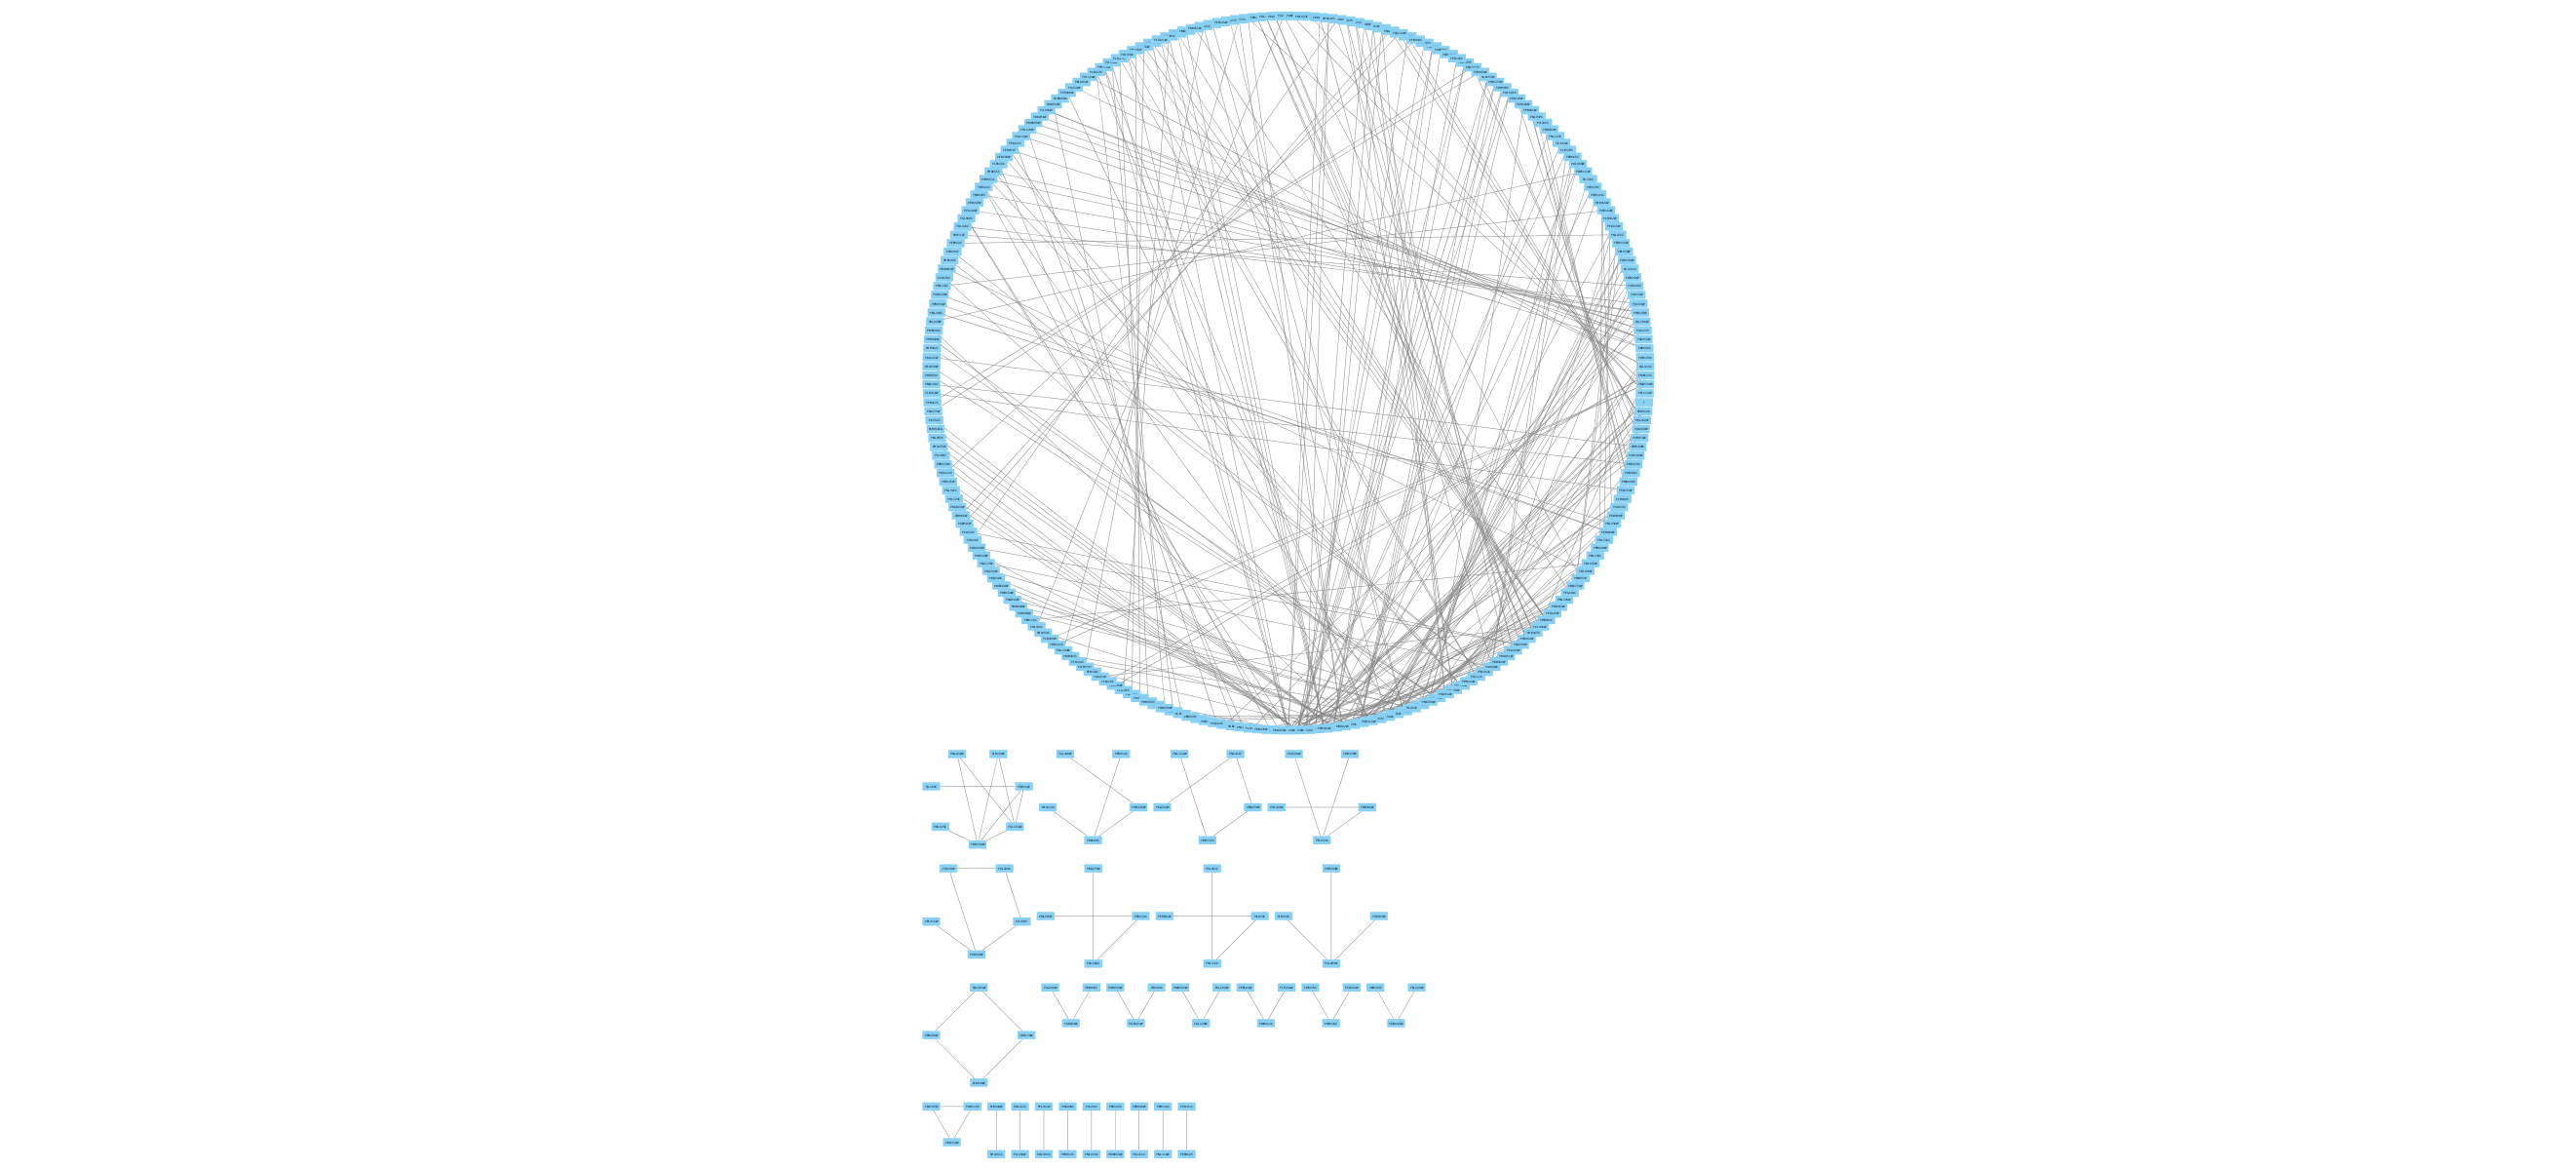

In [76]:
# Merge them in Cytoscape
yeast_net.update_node_table(df=table_data, network_key_col='name')

# Apply layout
cy.layout.apply(name='degree-circle', network=yeast_net)

# Show it
yeast_net_png = yeast_net.get_png()
Image(yeast_net_png)

# Get the default Style and apply it
---------------------------------------

In Cytoscape, there are several useful default styles. You can get the list of the style and apply the style that you want.

## Get the default Style
---------------------------------------

First, to know the available default style, let's get all of the default style in Cytoscape. If you add some original style, you can get that style by this method. However, now we don't make any style, so we can only get the default style here.

In [63]:
# Get the all Style.
cy.style.get_all()

['Curved',
 'Sample2',
 'Nested Network Style',
 'Ripple',
 'default',
 'Marquee',
 'Minimal',
 'Sample1',
 'Big Labels',
 'Sample3',
 'Gradient1',
 'Solid',
 'default black',
 'Directed',
 'Universe']

## Apply default network
---------------------------------------

Now, we know the available style, so let's apply the default network.

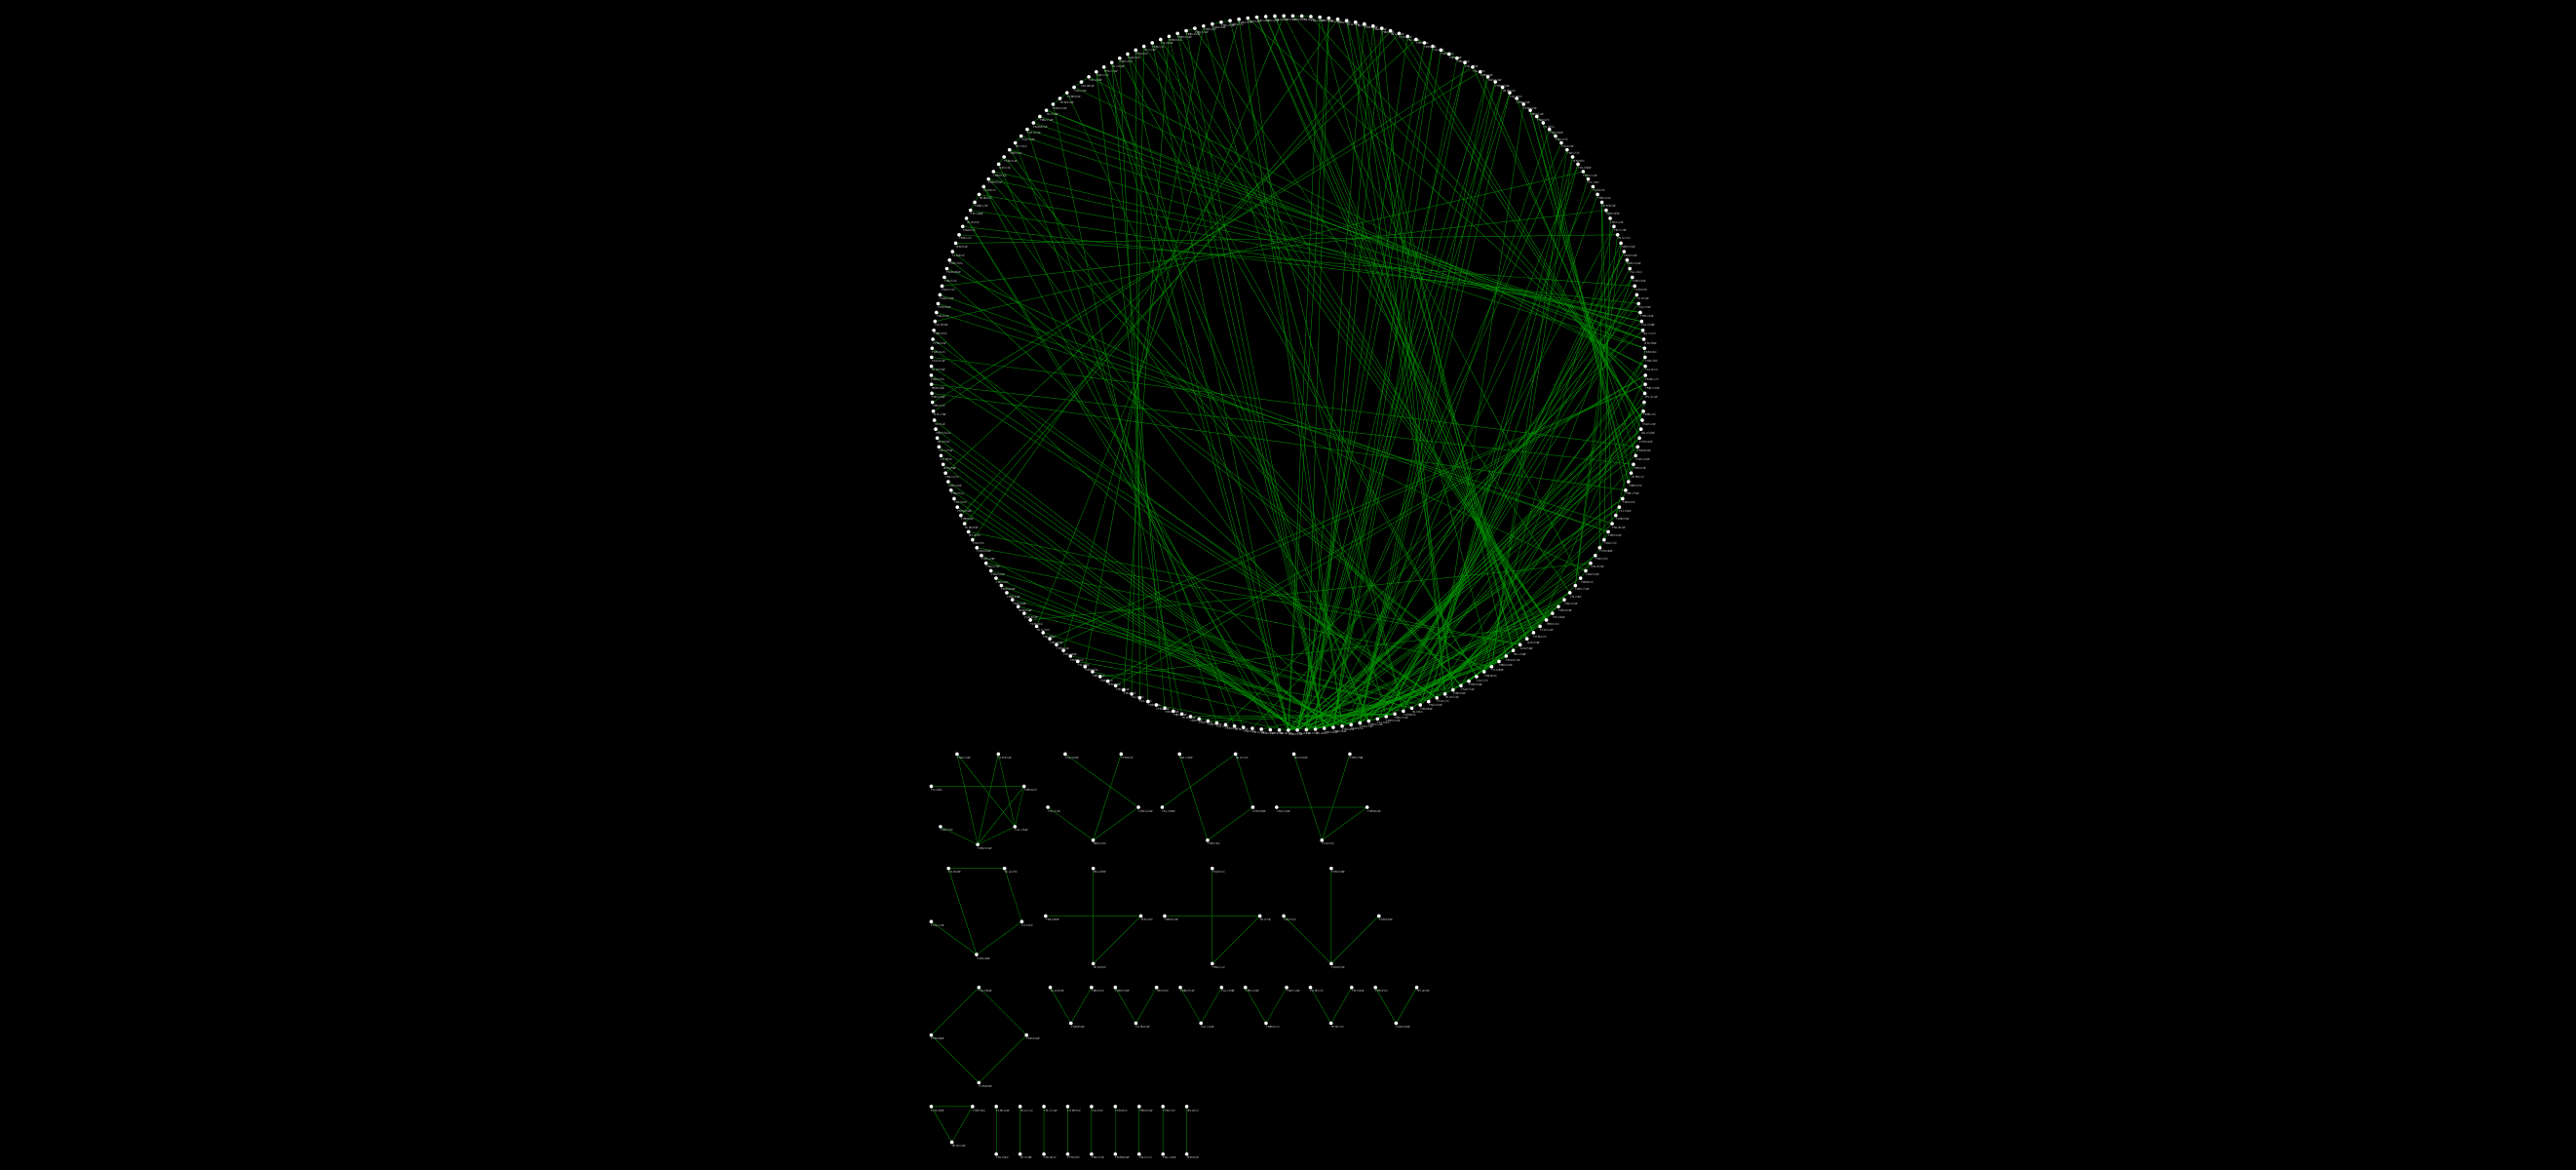

In [78]:
# Apply 'default black' Style.
cy.style.apply(style = cy.style.create('default black'), network = yeast_net)

# Show it
yeast_net_png = yeast_net.get_png()
Image(yeast_net_png)

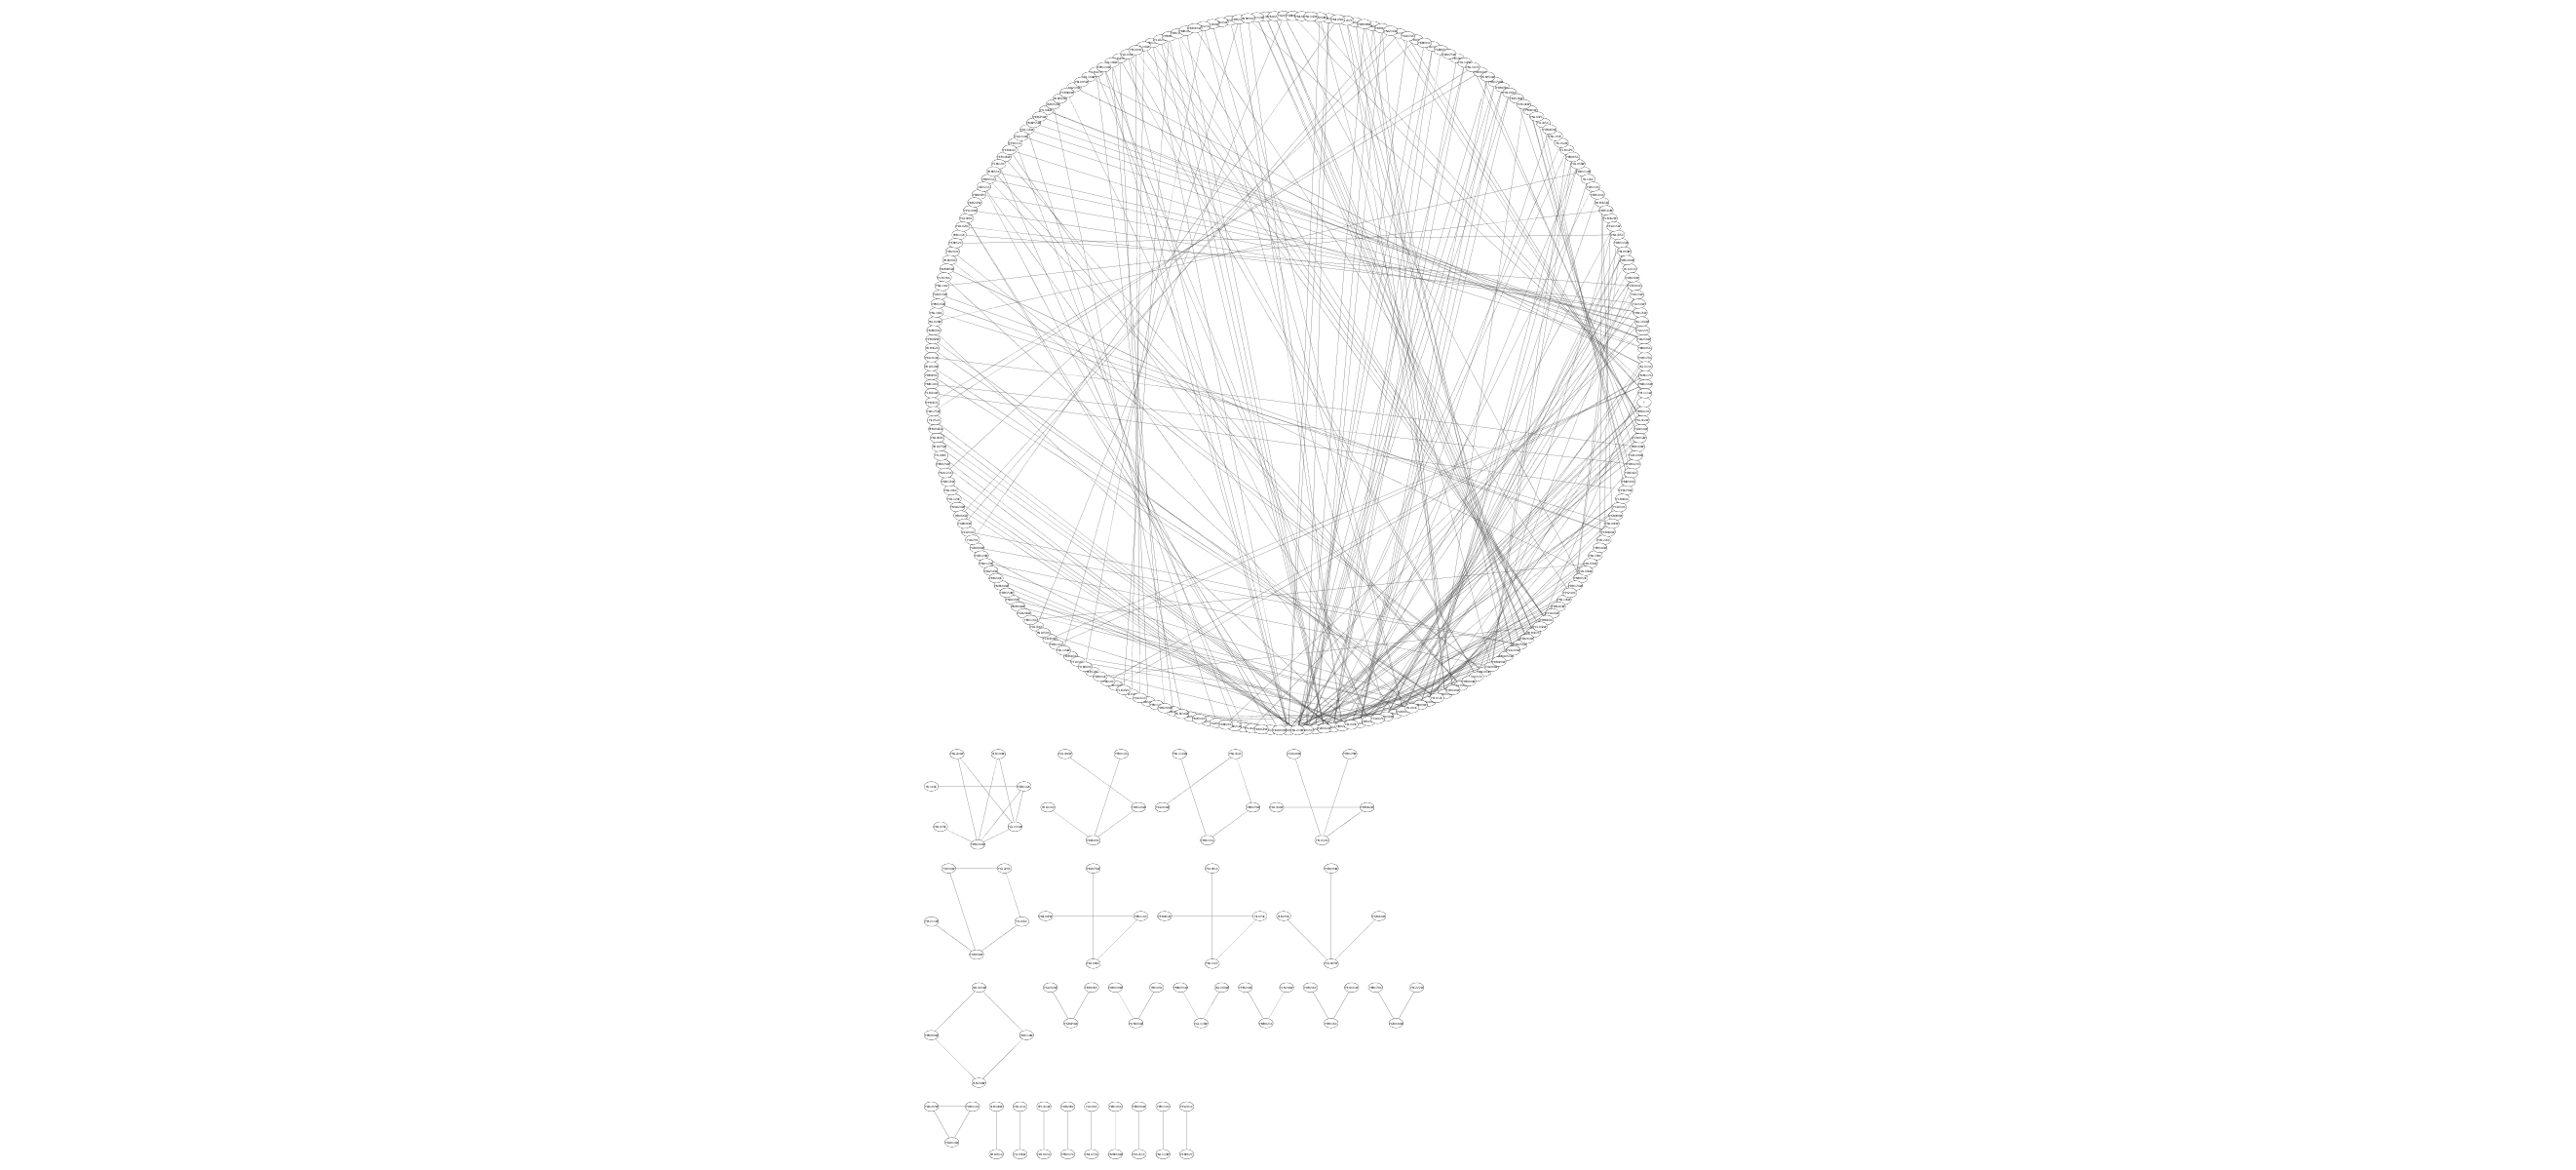

In [77]:
# Apply 'Ripple' Style.
cy.style.apply(style = cy.style.create('Nested Network Style'), network = yeast_net)

# Show it
yeast_net_png = yeast_net.get_png()
Image(yeast_net_png)

# Get visual propeties
---------------------------------------

To create your original style, we have to set value to visual propeties. First, we should know the kind of visual propeties and there are several visual propeties in each node, edge and network.

## Get all visual propeties
---------------------------------------

We can get all visual propeties.

In [66]:
# Get all available Visual Properties
vps = cy.style.vps.get_all()

# Show it
print(json.dumps(vps, indent=4))

{
    "NODE_LABEL_POSITION": "Node Label Position",
    "NETWORK_TITLE": "Network Title",
    "NODE_CUSTOMPAINT_4": "Node Custom Paint 4",
    "NETWORK_BACKGROUND_PAINT": "Network Background Paint",
    "NODE_CUSTOMGRAPHICS_9": "Node Image/Chart 9",
    "NODE_HEIGHT": "Node Height",
    "NODE_CUSTOMPAINT_9": "Node Custom Paint 9",
    "NODE_VISIBLE": "Node Visible",
    "EDGE_CURVED": "Edge Curved",
    "EDGE_SELECTED": "Edge Selected",
    "NODE_Z_LOCATION": "Node Z Location",
    "EDGE_TOOLTIP": "Edge Tooltip",
    "NODE_X_LOCATION": "Node X Location",
    "NODE_CUSTOMPAINT_7": "Node Custom Paint 7",
    "NODE_CUSTOMGRAPHICS_5": "Node Image/Chart 5",
    "NODE_FILL_COLOR": "Node Fill Color",
    "NETWORK_SIZE": "Network Size",
    "COMPOUND_NODE_PADDING": "Padding (Compound Node)",
    "NODE_CUSTOMPAINT_3": "Node Custom Paint 3",
    "NETWORK_NODE_SELECTION": "Network Node Selection",
    "NODE_CUSTOMGRAPHICS_2": "Node Image/Chart 2",
    "NETWORK_SCALE_FACTOR": "Network Scale Factor

## Get node visual propeties
---------------------------------------

In [67]:
# Get node Visual Properties
node_vps = cy.style.vps.get_node_visual_props()

# Show it
print(json.dumps(node_vps, indent=4))

[
    "COMPOUND_NODE_PADDING",
    "COMPOUND_NODE_SHAPE",
    "NODE",
    "NODE_BORDER_PAINT",
    "NODE_BORDER_STROKE",
    "NODE_BORDER_TRANSPARENCY",
    "NODE_BORDER_WIDTH",
    "NODE_CUSTOMGRAPHICS_1",
    "NODE_CUSTOMGRAPHICS_2",
    "NODE_CUSTOMGRAPHICS_3",
    "NODE_CUSTOMGRAPHICS_4",
    "NODE_CUSTOMGRAPHICS_5",
    "NODE_CUSTOMGRAPHICS_6",
    "NODE_CUSTOMGRAPHICS_7",
    "NODE_CUSTOMGRAPHICS_8",
    "NODE_CUSTOMGRAPHICS_9",
    "NODE_CUSTOMGRAPHICS_POSITION_1",
    "NODE_CUSTOMGRAPHICS_POSITION_2",
    "NODE_CUSTOMGRAPHICS_POSITION_3",
    "NODE_CUSTOMGRAPHICS_POSITION_4",
    "NODE_CUSTOMGRAPHICS_POSITION_5",
    "NODE_CUSTOMGRAPHICS_POSITION_6",
    "NODE_CUSTOMGRAPHICS_POSITION_7",
    "NODE_CUSTOMGRAPHICS_POSITION_8",
    "NODE_CUSTOMGRAPHICS_POSITION_9",
    "NODE_CUSTOMGRAPHICS_SIZE_1",
    "NODE_CUSTOMGRAPHICS_SIZE_2",
    "NODE_CUSTOMGRAPHICS_SIZE_3",
    "NODE_CUSTOMGRAPHICS_SIZE_4",
    "NODE_CUSTOMGRAPHICS_SIZE_5",
    "NODE_CUSTOMGRAPHICS_SIZE_6",
    "NODE_CUSTO

## Get edge visual propeties
---------------------------------------

In [68]:
# Get edge Visual Properties for each data type
edge_vps = cy.style.vps.get_edge_visual_props()

# Show it
print(json.dumps(edge_vps, indent=4))

[
    "EDGE",
    "EDGE_BEND",
    "EDGE_CURVED",
    "EDGE_LABEL",
    "EDGE_LABEL_COLOR",
    "EDGE_LABEL_FONT_FACE",
    "EDGE_LABEL_FONT_SIZE",
    "EDGE_LABEL_TRANSPARENCY",
    "EDGE_LABEL_WIDTH",
    "EDGE_LINE_TYPE",
    "EDGE_PAINT",
    "EDGE_SELECTED",
    "EDGE_SELECTED_PAINT",
    "EDGE_SOURCE_ARROW_SELECTED_PAINT",
    "EDGE_SOURCE_ARROW_SHAPE",
    "EDGE_SOURCE_ARROW_UNSELECTED_PAINT",
    "EDGE_STROKE_SELECTED_PAINT",
    "EDGE_STROKE_UNSELECTED_PAINT",
    "EDGE_TARGET_ARROW_SELECTED_PAINT",
    "EDGE_TARGET_ARROW_SHAPE",
    "EDGE_TARGET_ARROW_UNSELECTED_PAINT",
    "EDGE_TOOLTIP",
    "EDGE_TRANSPARENCY",
    "EDGE_UNSELECTED_PAINT",
    "EDGE_VISIBLE",
    "EDGE_WIDTH"
]


## Get network visual propeties
---------------------------------------

In [69]:
# Get network Visual Properties for each data type
network_vps = cy.style.vps.get_network_visual_props()

# Show it
print(json.dumps(network_vps, indent=4))

[
    "NETWORK",
    "NETWORK_BACKGROUND_PAINT",
    "NETWORK_CENTER_X_LOCATION",
    "NETWORK_CENTER_Y_LOCATION",
    "NETWORK_CENTER_Z_LOCATION",
    "NETWORK_DEPTH",
    "NETWORK_EDGE_SELECTION",
    "NETWORK_HEIGHT",
    "NETWORK_NODE_SELECTION",
    "NETWORK_SCALE_FACTOR",
    "NETWORK_SIZE",
    "NETWORK_TITLE",
    "NETWORK_WIDTH"
]


# Create original Style and apply it
---------------------------------------

Now, we know the all of the visual propeties, so let's create your original style and apply it.

## Create original Style
---------------------------------------

To create original style, the first step is to create style object. Then, add the value to each visual propeties that you want to change from default.

In [79]:
# Create Visual Style as code (or by hand if you prefer)
my_yeast_style = cy.style.create('GAL Style')

# You can set default values as key-value pairs.
basic_settings = {
    
    'NODE_FILL_COLOR': '#6AACB8',
    'NODE_SIZE': 100,
    'NODE_BORDER_WIDTH': 0,
    'NODE_LABEL_COLOR': '#555555',
    
    'EDGE_WIDTH': 2,
    'EDGE_TRANSPARENCY': 100,
    'EDGE_STROKE_UNSELECTED_PAINT': '#333333',
    
    'NETWORK_BACKGROUND_PAINT': '#FFFFEA'
}

# Set basic style
my_yeast_style.update_defaults(basic_settings)

## Apply original style
---------------------------------------

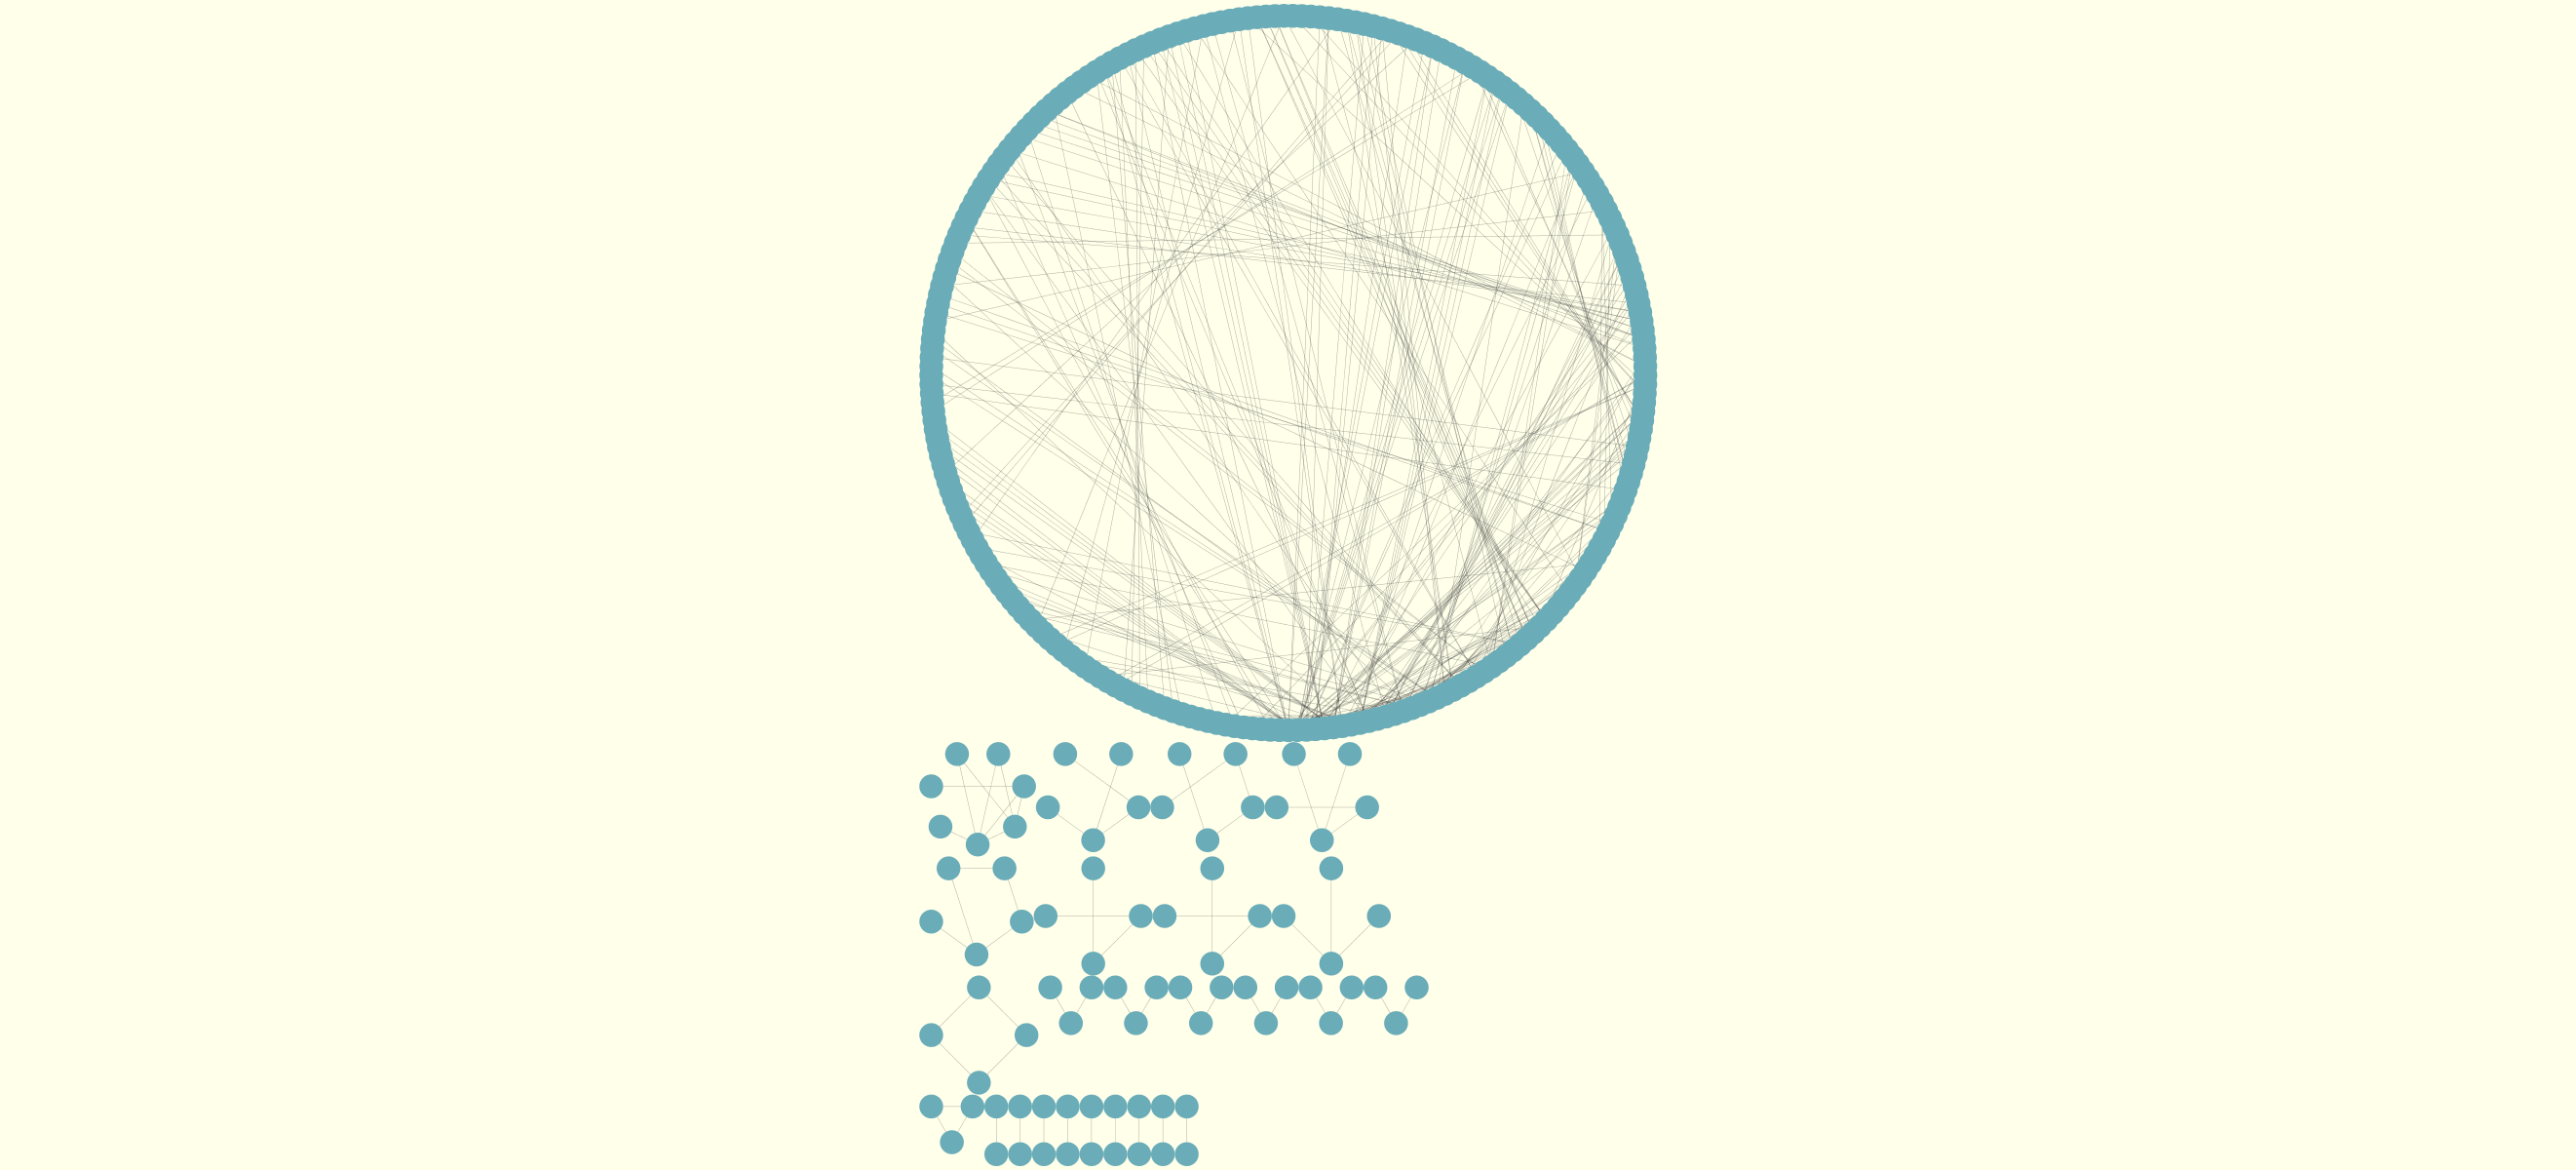

In [80]:
# let's apply that style
cy.style.apply(style=my_yeast_style, network=yeast_net)

# Show it
yeast_net_png = yeast_net.get_png()
Image(yeast_net_png)

# Create passthrough mapping
---------------------------------------

The "passthrough" means that vizual propetiy connect with the table column. So, if you set the 'NODE_LABEL' in visual propety as 'lable' data of the table's column, you can bind these data and will appear it as graph in Cytoscape.

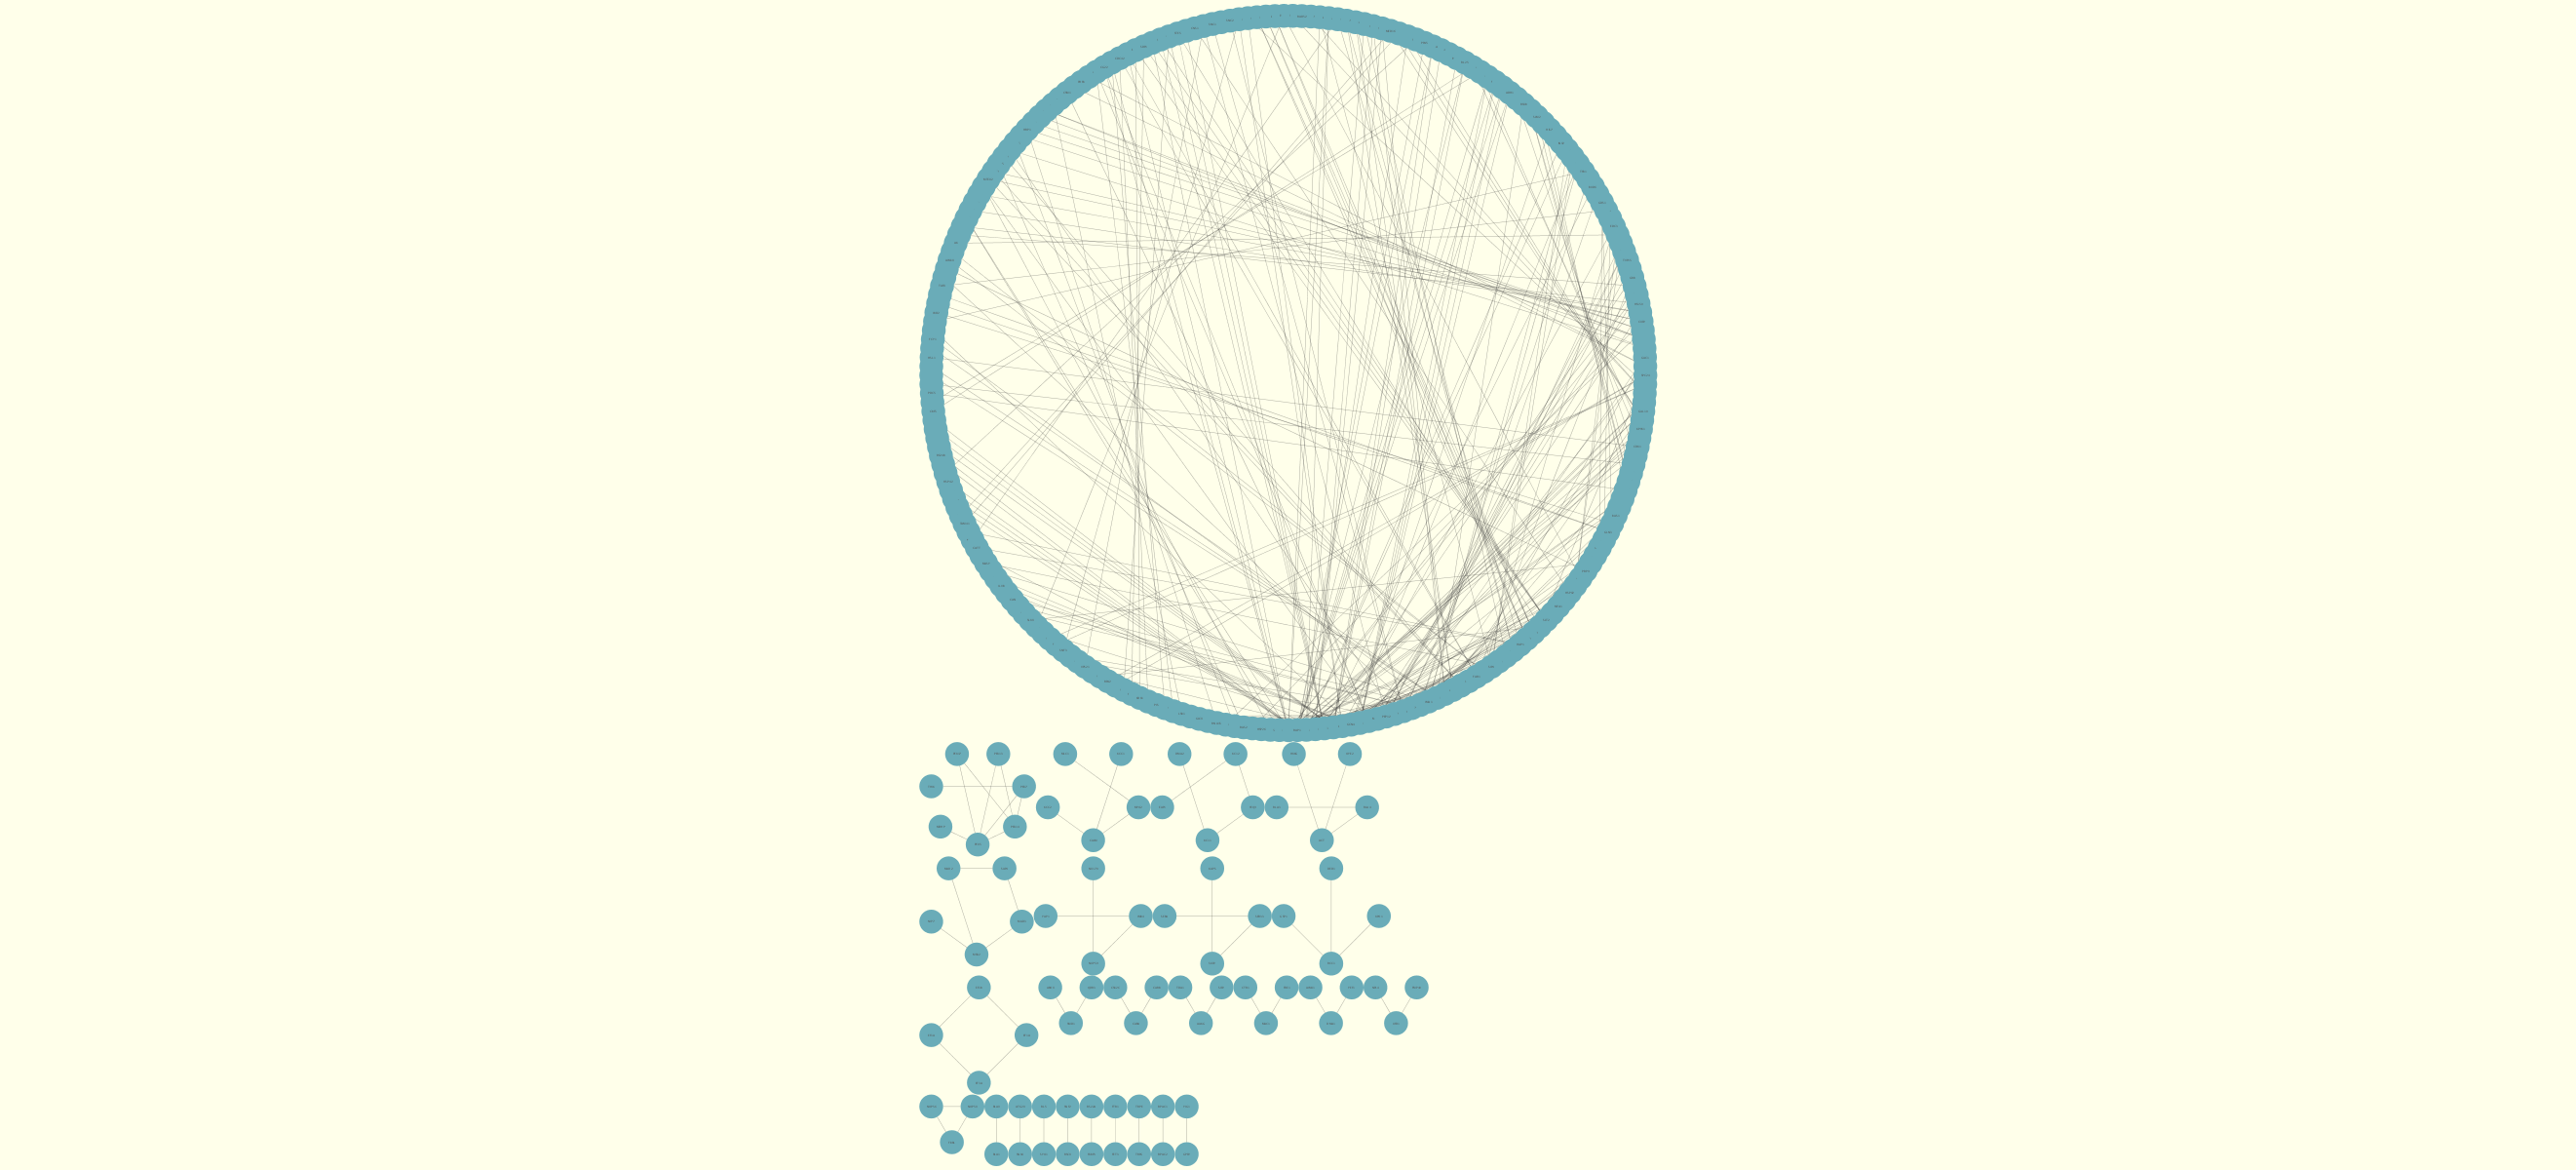

In [82]:
# Create passthrough mapping
my_yeast_style.create_passthrough_mapping(column='label', vp='NODE_LABEL', col_type='String')

# apply it
cy.style.apply(style=my_yeast_style, network=yeast_net)

# Show it
yeast_net_png = yeast_net.get_png()
Image(yeast_net_png)

# Create continuous mapping
---------------------------------------

The continuous mapping is to map the network value to visual style. For example, you can g


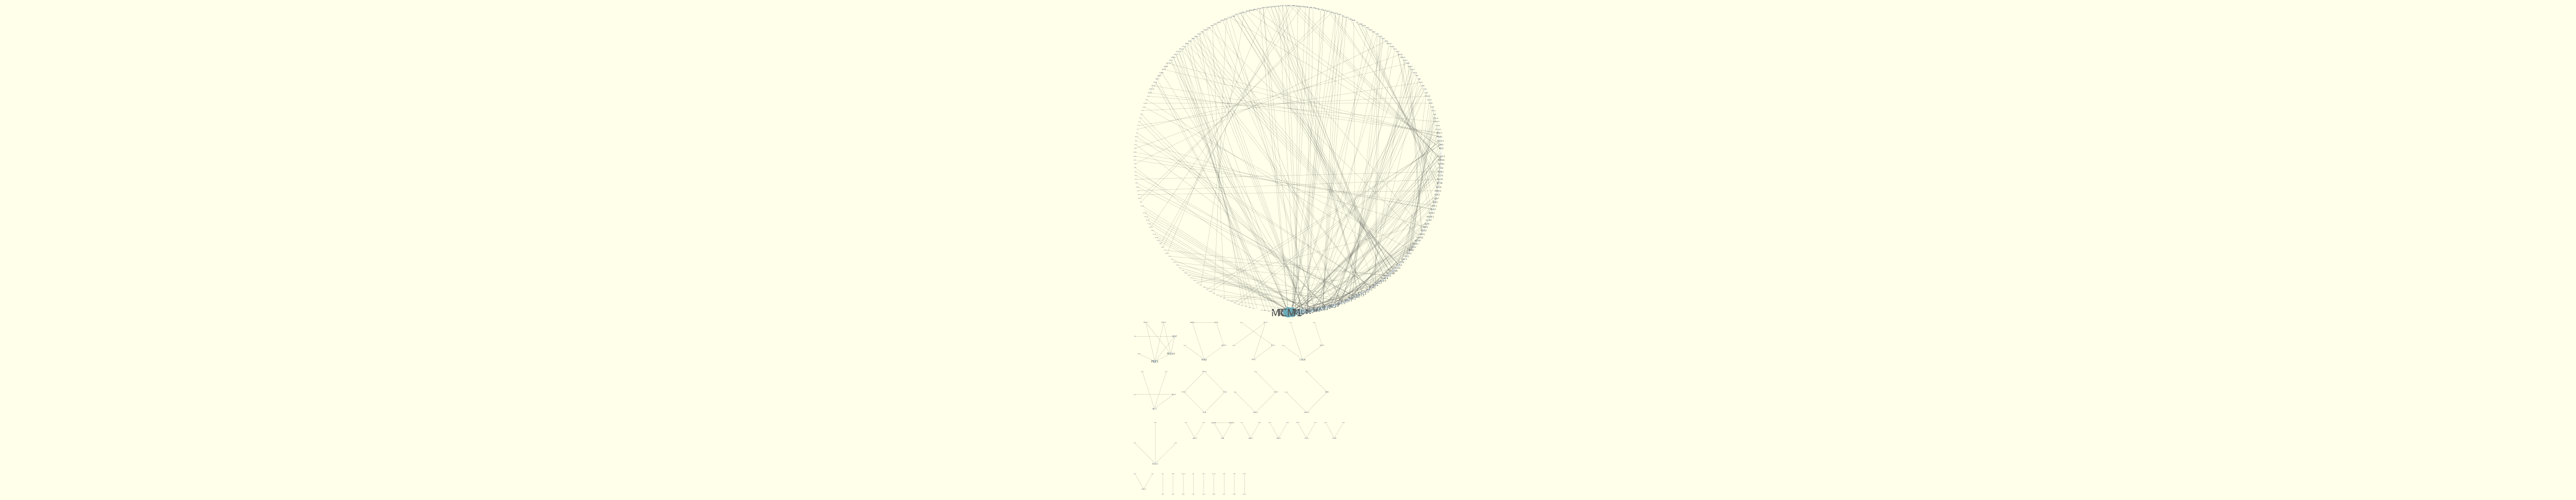

In [73]:
# Get the value for continuous mapping
degrees = yeast_net.get_node_column('degree.layout')

# Map the color gradient from that value
color_gradient = StyleUtil.create_2_color_gradient(min=degrees.min(), max=degrees.max(), colors=('white', '#6AACB8'))

# Map the size from value
degree_to_size = StyleUtil.create_slope(min=degrees.min(), max=degrees.max(), values=(10, 100))

# Crate continuous mapping
my_yeast_style.create_continuous_mapping(column='degree.layout', vp='NODE_FILL_COLOR', col_type='Integer', points=color_gradient)
my_yeast_style.create_continuous_mapping(column='degree.layout', vp='NODE_SIZE', col_type='Integer', points=degree_to_size)
my_yeast_style.create_continuous_mapping(column='degree.layout', vp='NODE_WIDTH', col_type='Integer', points=degree_to_size)
my_yeast_style.create_continuous_mapping(column='degree.layout', vp='NODE_HEIGHT', col_type='Integer', points=degree_to_size)
my_yeast_style.create_continuous_mapping(column='degree.layout', vp='NODE_LABEL_FONT_SIZE', col_type='Integer', points=degree_to_size)

# apply it
cy.style.apply(my_yeast_style, yeast_net)

# Show it
yeast_net_png = yeast_net.get_png()
Image(yeast_net_png)

# Create descrete mapping 
---------------------------------------

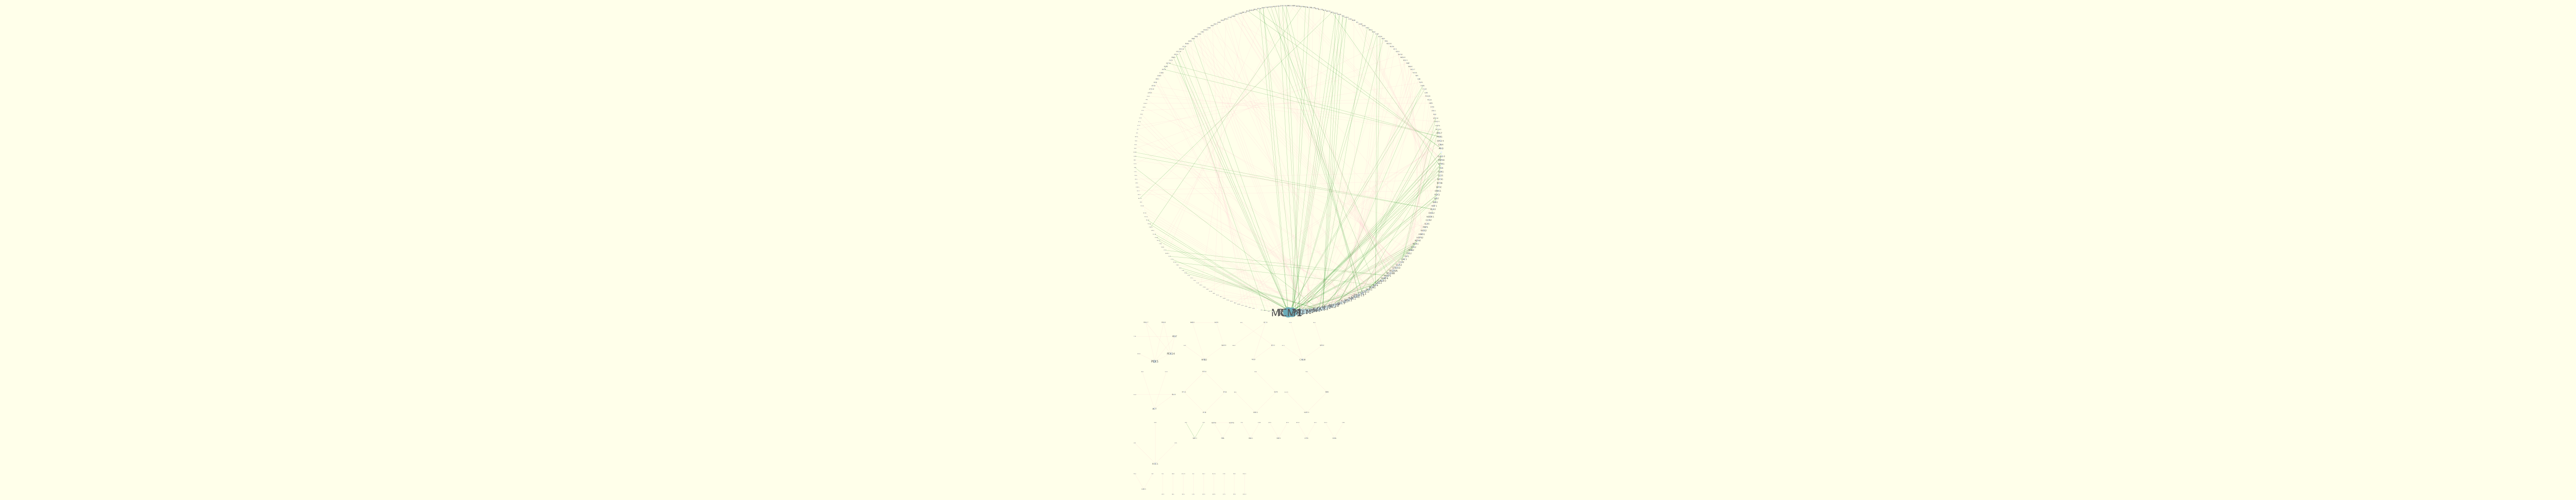

In [74]:
# Discrete mapping: Simply prepare key-value pairs and send it
kv_pair = {
    'pp': 'pink',
    'pd': 'green'
}
my_yeast_style.create_discrete_mapping(column='interaction', 
                               col_type='String', vp='EDGE_STROKE_UNSELECTED_PAINT', mappings=kv_pair)

# apply it
cy.style.apply(my_yeast_style, yeast_net)

# Show it
yeast_net_png = yeast_net.get_png()
Image(yeast_net_png)